In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Data/playground-series-s4e1/train.csv')
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


### **Clean data and remove dublicate**

In [5]:
df.isnull().sum()

,0
id,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


### **Exploratory** **Analysis**

In [8]:
df['CreditScore'].value_counts().reset_index()

,CreditScore,count
0,850,2532
1,678,2299
2,684,1718
3,667,1658
4,705,1605
...,...,...
452,419,1
453,386,1
454,358,1
455,423,1


<Axes: >

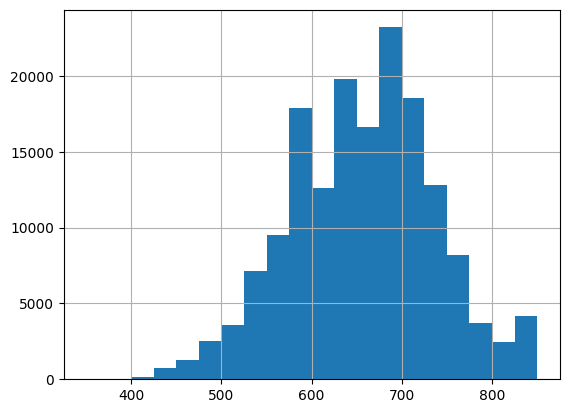

In [9]:
df['CreditScore'].hist(bins=20)

In [10]:
df['Geography'].value_counts().reset_index()

,Geography,count
0,France,94215
1,Spain,36213
2,Germany,34606


<Axes: >

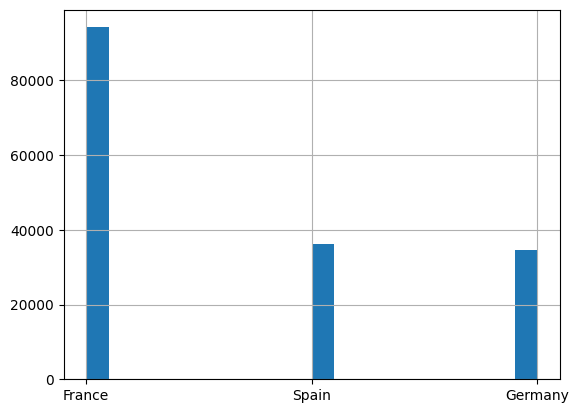

In [11]:
df['Geography'].hist(bins=20)

In [12]:
df['Age'].value_counts().reset_index()

,Age,count
0,37.00,9255
1,38.00,9246
2,35.00,9118
3,34.00,8625
4,36.00,8556
...,...,...
66,84.00,4
67,83.00,3
68,85.00,3
69,36.44,1


<Axes: >

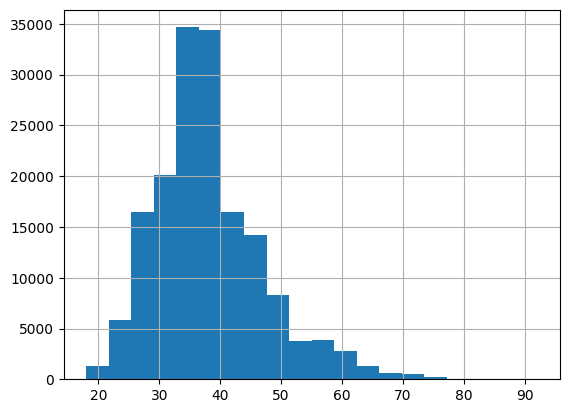

In [13]:
df['Age'].hist(bins=20)

In [14]:
df['Tenure'].value_counts().reset_index()

,Tenure,count
0,2,18045
1,7,17810
2,4,17554
3,8,17520
4,5,17268
5,1,16760
6,9,16709
7,3,16630
8,6,15822
9,10,5909


<Axes: >

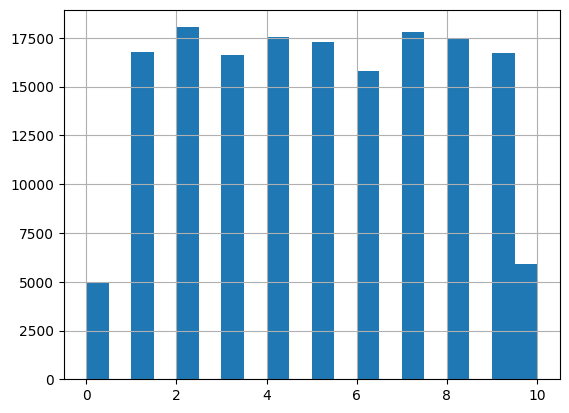

In [15]:
df['Tenure'].hist(bins=20)

In [16]:
df['Balance'].value_counts().reset_index()

,Balance,count
0,0.00,89648
1,124577.33,88
2,127864.40,64
3,122314.50,63
4,129855.32,59
...,...,...
30070,125824.21,1
30071,158741.56,1
30072,126815.52,1
30073,61172.57,1


<Axes: >

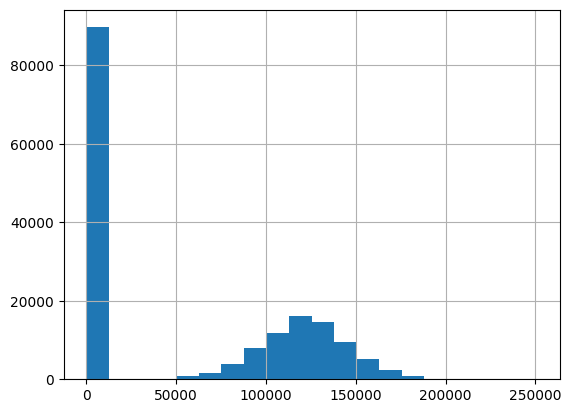

In [17]:
df['Balance'].hist(bins=20)

In [18]:
df['NumOfProducts'].value_counts().reset_index()

,NumOfProducts,count
0,2,84291
1,1,77374
2,3,2894
3,4,475


<Axes: >

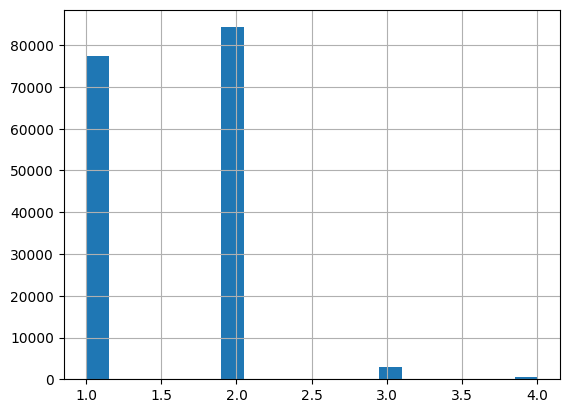

In [19]:
df['NumOfProducts'].hist(bins=20)

In [20]:
df['HasCrCard'].value_counts().reset_index()

,HasCrCard,count
0,1.0,124428
1,0.0,40606


<Axes: >

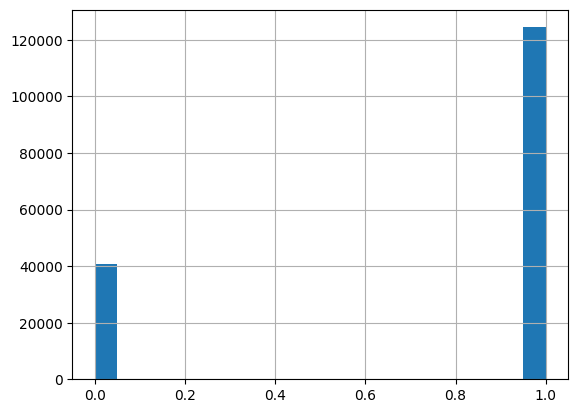

In [21]:
df['HasCrCard'].hist(bins=20)

In [22]:
df['IsActiveMember'].value_counts().reset_index()

,IsActiveMember,count
0,0.0,82885
1,1.0,82149


<Axes: >

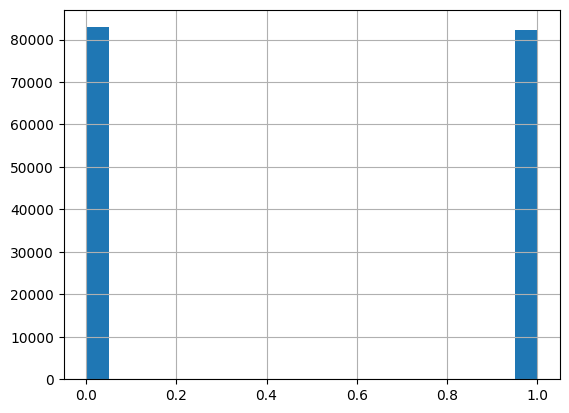

In [23]:
df['IsActiveMember'].hist(bins=20)

In [24]:
df['EstimatedSalary'].value_counts().reset_index()

,EstimatedSalary,count
0,88890.05,178
1,140941.47,107
2,167984.72,100
3,90876.95,98
4,129964.94,98
...,...,...
55293,102747.73,1
55294,170593.45,1
55295,109179.48,1
55296,60538.47,1


<Axes: >

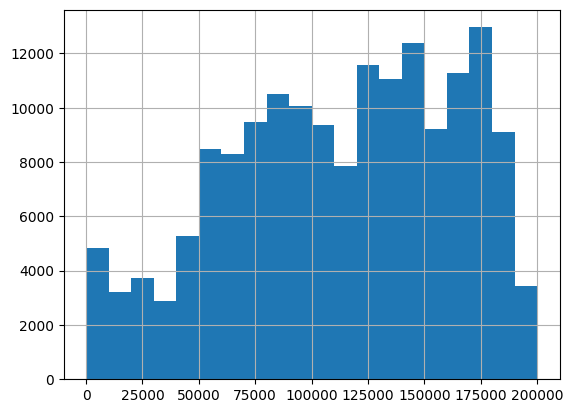

In [25]:
df['EstimatedSalary'].hist(bins=20)

### **Test Hypothesis**



### ** my think Insights on Customer Churn:**

# **1-Credit Score:**
Customers with high credit scores are less likely to churn.
Customers with low credit scores are more likely to churn .

# **2-Age:**
Customers with very high or very low age are less likely to churn.
Customers with an average age have a higher probability of churning.

# **3-Tenure (Length of Time as a Customer):**
Customers with long or very short tenure are less likely to churn.
Customers with average tenure are more likely to churn.

# **4-Account Balance:**
Customers with a high balance are less likely to churn.
Customers with a very low balance are more likely to churn.

# **5-Number of Products:**
Customers with a higher number of products are less likely to churn.

# **6-Credit Card Ownership:**
Customers who own a credit card are less likely to churn.

# **7-Active Member Status:**
Customers who are active members are less likely to churn.

# **8-Estimated Salary:**
Customers with a high estimated salary are less likely to churn.
This version aims to provide a logical flow, making it easier for the reader to understand the relationship between each factor and customer churn.









## **Credit score VS Exited**

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='CreditScore', ylabel='Count'>

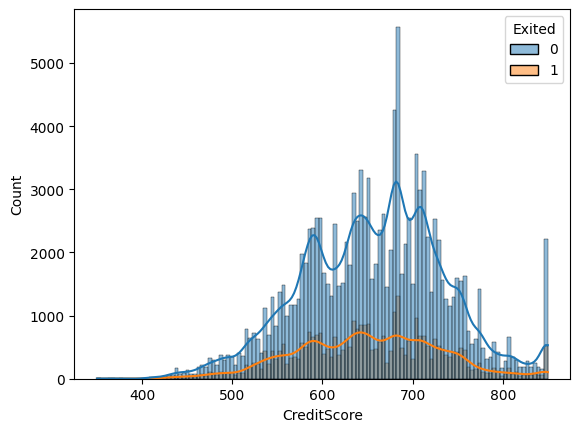

In [26]:
sns.histplot(data=df,x='CreditScore',hue='Exited',kde=True)


## **Based on the graph, it is clear that people with a high creditscore tend to not churn.**

## **Geography VS Exited  **

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='Geography', ylabel='count'>

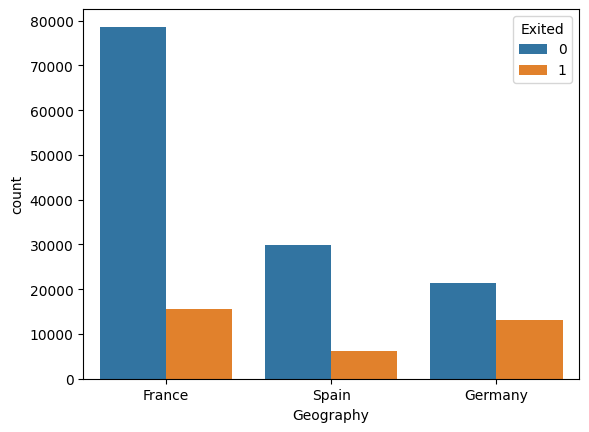

In [27]:
sns.countplot(data=df,x='Geography',hue='Exited')

# **the ratio between churn and not churn in German is height.Therefore,people from Germany are more likely to churn compared to people from spain and france.**

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='Gender', ylabel='count'>

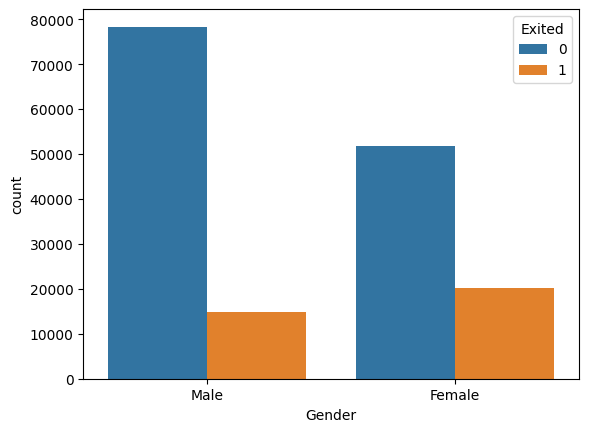

In [28]:
sns.countplot(data=df,x='Gender',hue='Exited')

## **the ratio between churn and non-churn is height for Female.Therefore,female are more likly to churn compared to Male.**

## **Age VS Exited**

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='Age', ylabel='Count'>

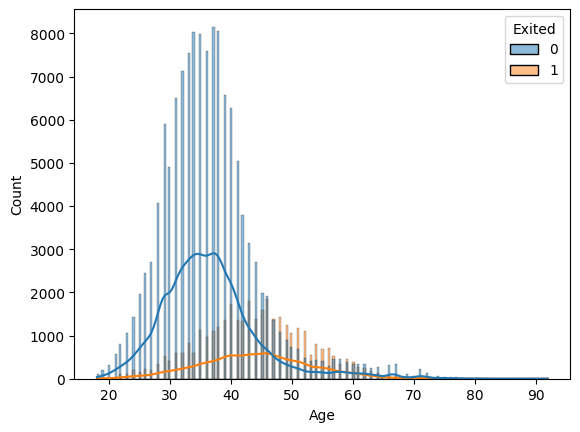

In [29]:
sns.histplot(data=df,x='Age',hue='Exited',kde=True)

## **Based on the graph, it is clear that people the age between 18 t0 44 are less likley to churn while 32 to 39 being most likly to churn**

## **Tenure VS Exited**

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='Tenure', ylabel='count'>

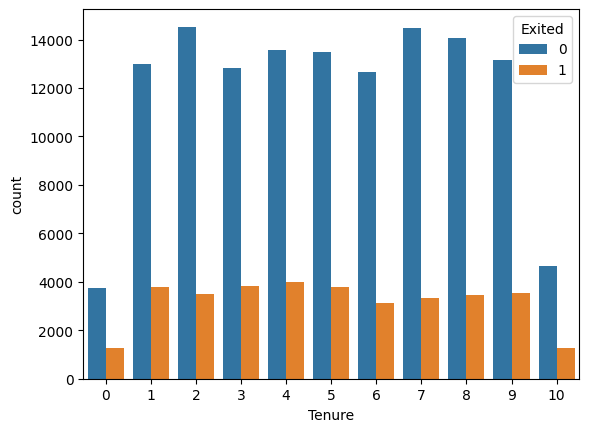

In [30]:
sns.countplot(data=df,x='Tenure',hue='Exited')

## **the ratio of people that has 0 and 10 tenure is height ,Therefore most likly to churn compared the people that Tenure between 1 to 9 .**

## **Balance VS Exited**

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='Exited', ylabel='Balance'>

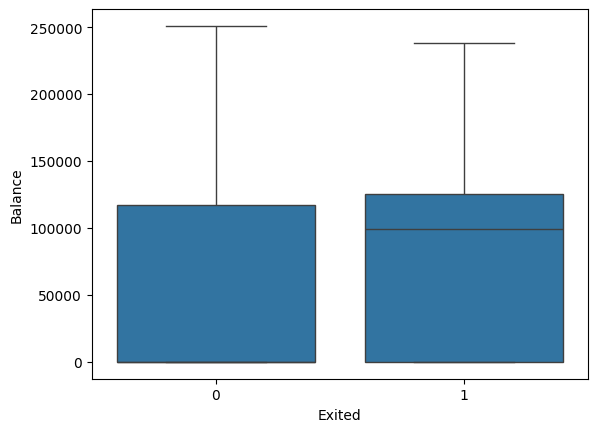

In [31]:
sns.boxplot(data=df,x='Exited',y='Balance')

## **the median seems higher for those who exited.Therefore,higher balance might indicate churn.**

## **Num of Product VS Exited**

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='NumOfProducts', ylabel='count'>

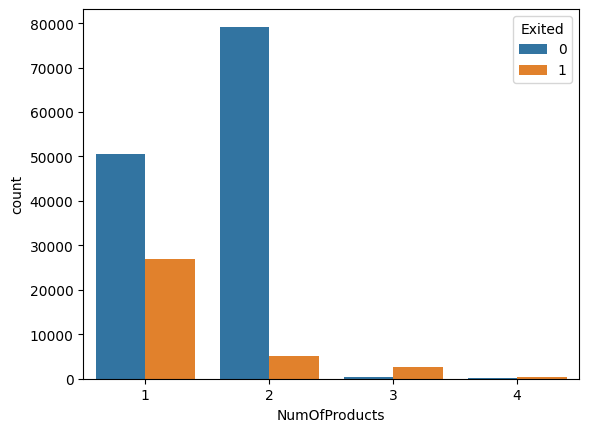

In [32]:
sns.countplot(data=df,x='NumOfProducts',hue='Exited')

## **the ratio of num of products that is 1 and 3,4 is hight,therefore most likely to churn compared with num of products 2**

## **HasCard VS Excited **

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='HasCrCard', ylabel='count'>

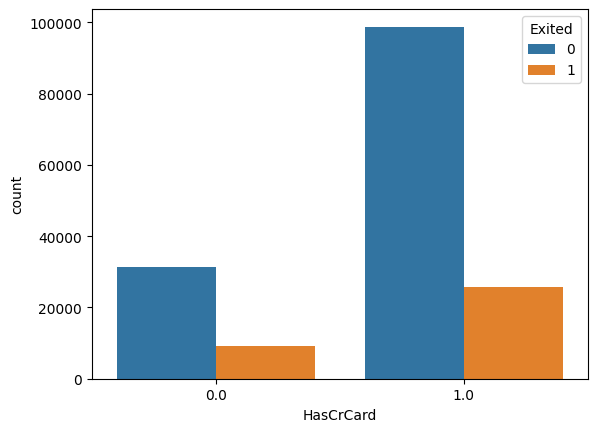

In [33]:
sns.countplot(data=df,x='HasCrCard',hue='Exited')

## **The ratio of not HasCard is hight .Therfore,the people not hascard most likely to churn compared to hascard.**

## **EstimateSalary VS Excited **

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

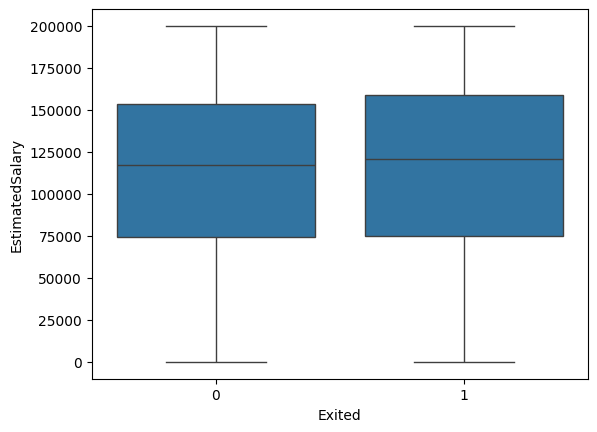

In [34]:
sns.boxplot(data=df,x='Exited',y='EstimatedSalary')

## **People who churn have a slightly (almost negligible) higher median than those who dont. Therefore, it might not actually determine churn.**

In [35]:
train_df=pd.get_dummies(df,columns=['Geography','Gender'])
train_df.head()

,id,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0,15674932,Okwudilichukwu,668,33.0,3,0.00,2,1.0,0.0,181449.97,0,True,False,False,False,True
1,1,15749177,Okwudiliolisa,627,33.0,1,0.00,2,1.0,1.0,49503.50,0,True,False,False,False,True
2,2,15694510,Hsueh,678,40.0,10,0.00,2,1.0,0.0,184866.69,0,True,False,False,False,True
3,3,15741417,Kao,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0,True,False,False,False,True
4,4,15766172,Chiemenam,716,33.0,5,0.00,2,1.0,1.0,15068.83,0,False,False,True,False,True


In [36]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 165034 non-null  int64  
 1   CustomerId         165034 non-null  int64  
 2   Surname            165034 non-null  object 
 3   CreditScore        165034 non-null  int64  
 4   Age                165034 non-null  float64
 5   Tenure             165034 non-null  int64  
 6   Balance            165034 non-null  float64
 7   NumOfProducts      165034 non-null  int64  
 8   HasCrCard          165034 non-null  float64
 9   IsActiveMember     165034 non-null  float64
 10  EstimatedSalary    165034 non-null  float64
 11  Exited             165034 non-null  int64  
 12  Geography_France   165034 non-null  bool   
 13  Geography_Germany  165034 non-null  bool   
 14  Geography_Spain    165034 non-null  bool   
 15  Gender_Female      165034 non-null  bool   
 16  Ge

In [37]:
train_df[['Geography_France','Geography_Germany','Geography_Spain','Gender_Female','Gender_Male']]=train_df[['Geography_France','Geography_Germany','Geography_Spain','Gender_Female','Gender_Male']].astype(int)

In [38]:
train_df

,id,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0,15674932,Okwudilichukwu,668,33.0,3,0.00,2,1.0,0.0,181449.97,0,1,0,0,0,1
1,1,15749177,Okwudiliolisa,627,33.0,1,0.00,2,1.0,1.0,49503.50,0,1,0,0,0,1
2,2,15694510,Hsueh,678,40.0,10,0.00,2,1.0,0.0,184866.69,0,1,0,0,0,1
3,3,15741417,Kao,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0,1,0,0,0,1
4,4,15766172,Chiemenam,716,33.0,5,0.00,2,1.0,1.0,15068.83,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,33.0,2,0.00,1,1.0,1.0,131834.75,0,0,0,1,1,0
165030,165030,15665521,Okechukwu,792,35.0,3,0.00,1,0.0,0.0,131834.45,0,1,0,0,0,1
165031,165031,15664752,Hsia,565,31.0,5,0.00,1,1.0,1.0,127429.56,0,1,0,0,0,1
165032,165032,15689614,Hsiung,554,30.0,7,161533.00,1,0.0,1.0,71173.03,0,0,0,1,1,0


In [39]:
df_new=train_df.drop(['id','CustomerId','Surname'],axis=1)
x=df_new.drop('Exited',axis=1)
y=df_new['Exited']

In [40]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x)

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


In [43]:
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
accuracy_score(y_test,y_pred)

0.7932559760050898

## **this mean the model correctly predicted whether a customer will churn or not 79% of the time,while this is a good accuracy, acuuracy alone doesnt always tell the full story,espcially in cases with implanced datasets. **

Confusion Matrix:
[[24982  1070]
 [ 5754  1201]]


<Axes: >

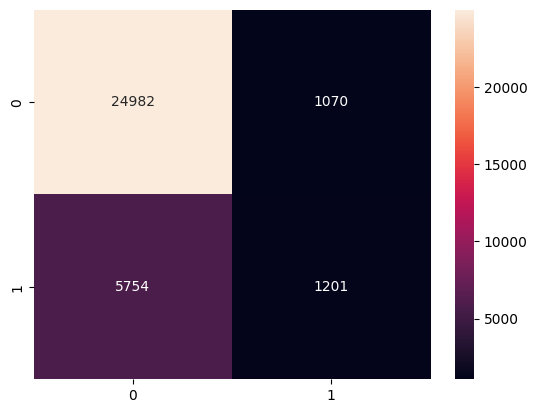

In [45]:
conf_matrix=confusion_matrix(y_test,y_pred)
print('Confusion Matrix:')
print(conf_matrix)
sns.heatmap(conf_matrix,annot=True,fmt='d')

## True Negative(TN):24982 the number of people who Non-churn and predict that correctly.

# False Negative(FN):5754 the number of people of people who churn but the model predict that incorrectly.

# True Positive(TP):1201 the number of people who churn and the model predict that true.

# False Positive(FP):1070 the number of people who Non-churn ,but the model predict that incorrectly this predict that is churn this is wrong.


# we can depend on this model for the people who Non-churn this predict 24982 True ,but the problem for predict the people who churn this predict 5754 wrong this is problem that the model cant predict the people who churn,although this predict the people who churn 1201 but that small number compared this 5754.

In [46]:
print("classification matrix")
print(classification_report(y_test,y_pred))

classification matrix
              precision    recall  f1-score   support

           0       0.81      0.96      0.88     26052
           1       0.53      0.17      0.26      6955

    accuracy                           0.79     33007
   macro avg       0.67      0.57      0.57     33007
weighted avg       0.75      0.79      0.75     33007



In [47]:
import imblearn
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
x_resampled,y_resampled=smote.fit_resample(x,y)

In [48]:
log_reg_smote=LogisticRegression()
log_reg_smote.fit(x_resampled,y_resampled)
y_pred_smote=log_reg_smote.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix smote:
[[18382  7670]
 [ 2351  4604]]
              precision    recall  f1-score   support

           0       0.89      0.71      0.79     26052
           1       0.38      0.66      0.48      6955

    accuracy                           0.70     33007
   macro avg       0.63      0.68      0.63     33007
weighted avg       0.78      0.70      0.72     33007



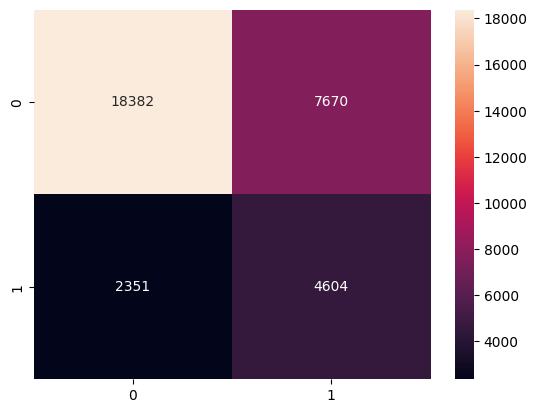

In [49]:
accuracy_score(y_test,y_pred_smote)
conf_matrix_smote=confusion_matrix(y_test,y_pred_smote)
print('Confusion Matrix smote:')
print(conf_matrix_smote)
sns.heatmap(conf_matrix_smote,annot=True,fmt='d')
print(classification_report(y_test,y_pred_smote))

## **after using smote The improvement is not sufficient for me to effectively work with this model.**

In [50]:
import xgboost as xgb
xgb_model=xgb.XGBClassifier()
xgb_model.fit(x_train,y_train)
y_pred_xgb=xgb_model.predict(x_test)

In [51]:
accuracy_score(y_test,y_pred_xgb)
#

0.8659678250068167

confusion matrix
[[24643  1409]
 [ 3015  3940]]


<Axes: >

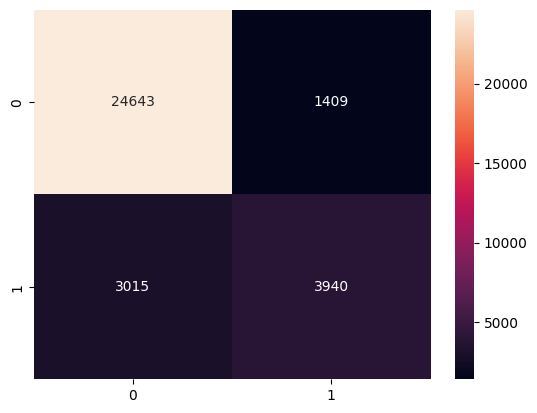

In [52]:
print("confusion matrix")
conf_matrix_xgb=confusion_matrix(y_test,y_pred_xgb)
print(conf_matrix_xgb)
sns.heatmap(conf_matrix_xgb,annot=True,fmt='d')

In [53]:
print("classification matrix")
print(classification_report(y_test,y_pred_xgb))

classification matrix
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     26052
           1       0.74      0.57      0.64      6955

    accuracy                           0.87     33007
   macro avg       0.81      0.76      0.78     33007
weighted avg       0.86      0.87      0.86     33007



In [54]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()
rf_model.fit(x_train,y_train)
y_pred_rf=rf_model.predict(x_test)

confusion matrix
[[24570  1482]
 [ 3213  3742]]


<Axes: >

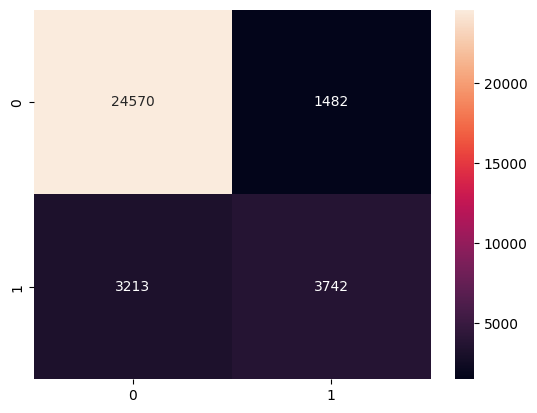

In [55]:
print("confusion matrix")
conf_matrix_rf=confusion_matrix(y_test,y_pred_rf)
print(conf_matrix_rf)
sns.heatmap(conf_matrix_rf,annot=True,fmt='d')

In [56]:
print("classification matrix :")
print(classification_report(y_test,y_pred_rf))

classification matrix :
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     26052
           1       0.72      0.54      0.61      6955

    accuracy                           0.86     33007
   macro avg       0.80      0.74      0.76     33007
weighted avg       0.85      0.86      0.85     33007



# Both XGBoost and Random Forest have high accuracy (greater than 0.80) with XGBoost having a slightly higher Accuracy than Random Forest (0.86 and 0.85, respectively). This means that both algorithms are good at determining either churners or non-churners or both.

# Both XGBoost and Random Forest have high Precision and Recall for non-churners (near 0.90) with XGBoost having slightly higher values for both. This means that both algorithms are very good at discerning between non-churners from churners (Precision) and generally good at identifying non-churners (greater than 0.90 recall).

# However, XGBoost does significantly better than Random Forest for churner Precision (0.73 compared to 0.68), meaning that it does better than Random Forest at determining when customers are not churners. Meanwhile, both do poorly in recalling churners (around 0.55). Meaning that they are not capturing about half of the churners.

# The low churner recall could be due to the small sample size of churners, such that the small fraction that get identified non-churners (1 - 0.89 XGBoost non-churner precision) is a big fraction of churner sample (1 - 0.56 XGBoost churner recall). Conversely, the significant fraction of non-churners identified as churners (1 - 0.73 XGBoost churner precision) is a small fraction of non-churners (1 - 0.92 XGBoost non-churner accuracy).

################

# **Overall, Random Forest and XGBoost do better than any of the Logistic regression models, with XGBoosst performing slightly better than Random Forest. Still all models fail to capture most of the churners. This could be a limitation of sample sizing or a lack of a feature that gives a stronger indication of churning.**

In [58]:
test_df=pd.read_csv('/content/drive/MyDrive/Data/playground-series-s4e1/test.csv')
test_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [63]:
test_df=pd.get_dummies(test_df,columns=['Geography','Gender'])
test_df.head()

,id,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,165034,15773898,Lucchese,586,23.0,2,0.00,2,0.0,1.0,160976.75,True,False,False,True,False
1,165035,15782418,Nott,683,46.0,2,0.00,1,1.0,0.0,72549.27,True,False,False,True,False
2,165036,15807120,K?,656,34.0,7,0.00,2,1.0,0.0,138882.09,True,False,False,True,False
3,165037,15808905,O'Donnell,681,36.0,8,0.00,1,1.0,0.0,113931.57,True,False,False,False,True
4,165038,15607314,Higgins,752,38.0,10,121263.62,1,1.0,0.0,139431.00,False,True,False,False,True


In [64]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 110023 non-null  int64  
 1   CustomerId         110023 non-null  int64  
 2   Surname            110023 non-null  object 
 3   CreditScore        110023 non-null  int64  
 4   Age                110023 non-null  float64
 5   Tenure             110023 non-null  int64  
 6   Balance            110023 non-null  float64
 7   NumOfProducts      110023 non-null  int64  
 8   HasCrCard          110023 non-null  float64
 9   IsActiveMember     110023 non-null  float64
 10  EstimatedSalary    110023 non-null  float64
 11  Geography_France   110023 non-null  bool   
 12  Geography_Germany  110023 non-null  bool   
 13  Geography_Spain    110023 non-null  bool   
 14  Gender_Female      110023 non-null  bool   
 15  Gender_Male        110023 non-null  bool   
dtypes:

In [65]:
test_df[['Geography_France','Geography_Germany','Geography_Spain','Gender_Female','Gender_Male']]=test_df[['Geography_France','Geography_Germany','Geography_Spain','Gender_Female','Gender_Male']].astype(int)

In [66]:
df_test_new=test_df.drop(['id','CustomerId','Surname'],axis=1)


In [67]:
df_test_new

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,586,23.0,2,0.00,2,0.0,1.0,160976.75,1,0,0,1,0
1,683,46.0,2,0.00,1,1.0,0.0,72549.27,1,0,0,1,0
2,656,34.0,7,0.00,2,1.0,0.0,138882.09,1,0,0,1,0
3,681,36.0,8,0.00,1,1.0,0.0,113931.57,1,0,0,0,1
4,752,38.0,10,121263.62,1,1.0,0.0,139431.00,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,570,29.0,7,116099.82,1,1.0,1.0,148087.62,0,0,1,0,1
110019,575,36.0,4,178032.53,1,1.0,1.0,42181.68,1,0,0,1,0
110020,712,31.0,2,0.00,2,1.0,0.0,16287.38,1,0,0,0,1
110021,709,32.0,3,0.00,1,1.0,1.0,158816.58,1,0,0,1,0


In [68]:
sc=StandardScaler()
x_test_new=sc.fit_transform(df_test_new)

In [74]:
x_test_new

array([[-0.8781765 , -1.70650447, -1.06788749, ..., -0.52697527,
         1.13502615, -1.13502615],
       [ 0.32956726,  0.88899019, -1.06788749, ..., -0.52697527,
         1.13502615, -1.13502615],
       [-0.00660884, -0.46518094,  0.71392236, ..., -0.52697527,
         1.13502615, -1.13502615],
       ...,
       [ 0.69064529, -0.80372372, -1.06788749, ..., -0.52697527,
        -0.88103697,  0.88103697],
       [ 0.65329239, -0.69087612, -0.71152552, ..., -0.52697527,
         1.13502615, -1.13502615],
       [-0.44239267, -0.12663815,  0.71392236, ..., -0.52697527,
         1.13502615, -1.13502615]])

In [75]:
Submission_prediction=xgb_model.predict(df_test_new)

In [77]:
person_id=test_df['id']

In [78]:
submission_df=pd.DataFrame({'id':person_id,'Exited':Submission_prediction})

In [79]:
submission_df

,id,Exited
0,165034,0
1,165035,1
2,165036,0
3,165037,0
4,165038,0
...,...,...
110018,275052,0
110019,275053,0
110020,275054,0
110021,275055,0


## **save file prediction without index**

In [80]:
submission_df.to_csv('submission.csv',index=False)